# IQ01 - TP3

## Exercice 1 : Algorithme de Deutsch-Jozsa

### 1. 3 qubits

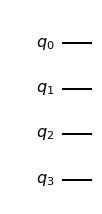

In [1]:
# CELLULE 1
# Oracle constant (3 qubits)
# initialization
import numpy as np

# importing Qiskit
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

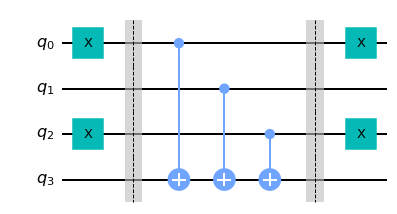

In [2]:
# CELLULE 2
# Oracle balanced (3 qubits)
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw('mpl')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  
/root/venv/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


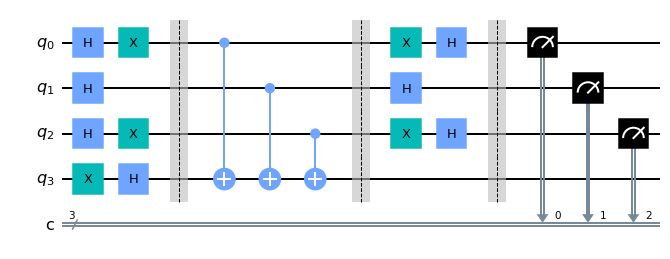

In [3]:
# CELLULE 3
# Algo Deutsch-Jozsa
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

/root/venv/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


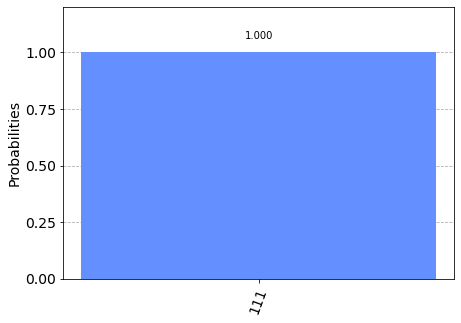

In [4]:
# CELLULE 4
# Mesures
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

## Rapport
Nous voulons pouvoir déterminer si la fonction est équilibrée ou constante avec un seul appel de la fonction grâce à un algorithme quantique.   
Tout d'abord il faut définir cette fonction oracle dans les deux cas différents, équilibrée ou constante.  

### Fonction constante
Dans la Cellule 1, on définit l'oracle constant. Il suffit de choisir si notre oracle renvoi tout le temps 0 ou tout le temps 1, ceci est décidé aléatoirement (Cellule 1, ligne 20). Si l'oracle renvoit 0 à chaque fois il n'y a rien à faire, puisque le qubit q3 est déjà initialisé à l'état |0>, s'il renvoit 1 tout le temps, alors il suffit d'appliquer une porte X (équivalent du NOT) sur le qubit q3 pour qu'il soit dans l'état |1> (Cellule 1, ligne 21-22).  

### Fonction équilibrée
Dans la Cellule 2, on définit l'oracle équilibré. On utilise 3 CNOT sur q0, q1, q2, tous avec le qubit q3 (Cellule 2, ligne 16-17), la sortie de la fonction équilibrée est l'état de q3. Ces 3 CNOT en cascade forment un fonction équilibrée (la moitié des sorties sont 0, et l'autre moitié sont 1). Il est possible de faire plusieurs fonctions équilibrées différentes en modifiant les entrées des qubits q0, q1 et q2 en appliquant une porte X, avant les CNOT. Pour cela nous utilisons une chaîne de caractère (C2,L4) pour savoir sur lesquels des 3 qubits appliquer une porte X (C2,L7-10). En modifiant la chaine caractère on aura une fonction différente avec les 3 CNOT et qui restera équilibrée. Il ne faut pas oublier de refaire des portes X sur les qubits où on a fait une porte X, afin d'inverser notre manipulation (C2,L22-24) (pour que ce soit transparent au niveau de l'algorithme, comme si nous ne les avions pas faites).

### Algorithme Deutsch-Jozsa
Puisque que nous avons nos 2 comportements de fonction (constante et équilibrée) nous pouvons à présent implémenter l'algorithme. Dans la Cellule 3 nous implémentons l'algorithme, en appelant depuis les deux cellules précédentes notre fonction/oracle. Nous commencons par préparer les qubits, on applique une porte Hadamard sur les 3 qubits "d'entrés" de la fonction (C3,L6-7), et on applique une porte X puis une porte H au qubit de "sortie" de la fonction (C3,L10-11). Ensuite nous appelons la fonction (C3,L14), balanced_oracle ou const_oracle en fonction du comportement que l'on veut. Ensuite nous rappliquons des portes Hadamard sur les 3 qubits "d'entrés" de la fonction (q0, q1 et q2)(C3,L17-18), et finalement nous mesurons ces 3 qubits (C3,L22-23). 

Dans la Cellule 4 nous pouvons voir le résultat de ces mesures, on remarque que dans le cas où la fonction est constante la mesure donnera à tous les coups l'état |000>, et dans le cas où la fonction est équilibrée la mesure donnera à tous les coups l'état |111>. Donc il est possible, avec un seul appel de l'oracle, de déterminer son comportement grâce au résultat de la mesure.

### 2. Généralisation à n qubits

In [5]:
# CELLULE 5
# Fonction oracle
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [6]:
# CELLULE 6
# Fonction algo
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

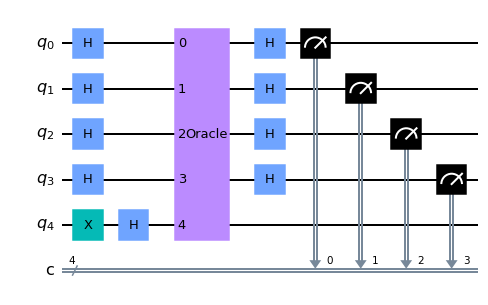

In [7]:
# CELLULE 7
# Execution de l'algo
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw('mpl')

/root/venv/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)
La fonction est équilibrée.


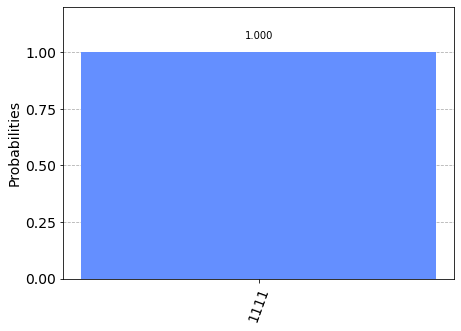

In [8]:
# CELLULE 8
# Mesures
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

if "1111" in answer:
    print("La fonction est équilibrée.")
if "0000" in answer:
    print("La fonction est constante.")

plot_histogram(answer)

## Rapport
Nous voulons maintenant généraliser l'oracle à une fonction à n qubits d'entrées. Le principe de l'algorithme reste le même, mais nous devons adapter certaines parties du code pour qu'il prenne en compte le bon nombre de qubits. Nous allons aussi redéfinir l'implémentation de l'oracle pour qu'il soit à n qubits.

### Oracle
La fonction implémentée dans la Cellule 5 (C5,L3) permet de créer l'oracle en lui passant en paramètre le comportement que l'on souhaite ("balanced" ou " constant") et le nombre de qubits d'entrés n. La ligne 7 (C5,L7) nous initialise bien n+1 qubits pour le circuit, car il y a n qubits "d'entrés" et un qubit de "sortie" pour la fonction.

Dans le cas constant, il n'y a rien de différent au code précédent (C5,L32-37).

Dans le cas équilibré, la chaîne de caractères est générée aléatoirement (C5,L13-15), et on applique une porte X aux qubits qui correspondent aux 1 dans la chaîne de caractères (C5,L19-21). Ensuite on fait tous les CNOT entre les qubits d'entrés et le qubit de sortie (C5,L24-25). Et enfin on inverse nos portes X qu'on a faites au début (C5,L27-29). Nous avons adapté notre fonction équilibrée à n qubits.

### Fonction de l'algorithme
L'algorithme est similaire, on applique une porte X puis une porte H au qubit de "sortie" (C6,L6-7), on applique une porte H à tous les qubits "d'entrés" (C6,L9-10). Ensuite on appelle l'oracle (C6,L12), et on rapplique des portes H sur les qubits "d'entrés" (C6,L14-15). On peut ensuite effectuer les mesures des qubits "d'entrés" (C6,L17-18).

### Exécution et mesures
Dans la Cellule 7 on exécute l'algorithme en appelant la fonction, et dans la Cellule 8 on visualise les mesures. De même que le cas précédent, si la fonction est constante le résultat de la mesure sera un état quantique composé uniquement de 0, et si la fonction est équilibrée alors le résultat de la mesure sera un état quantique composé uniquement de 1.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee1cbf87-7285-41f3-b185-437a373e9409' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>